In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

from scipy.stats import zscore

In [39]:
# Load dataset
df= pd.read_csv("diabetic_data.csv")

In [3]:
# Data head
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [40]:
df.shape

(101766, 50)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [42]:
df.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


In [43]:
df.isnull().sum()

encounter_id                0
patient_nbr                 0
race                        0
gender                      0
age                         0
weight                      0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
payer_code                  0
medical_specialty           0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazo

In [44]:
print(df.duplicated().sum())

0


In [45]:
df.drop(['weight','payer_code','encounter_id', 'patient_nbr'],axis=1,inplace=True)

We can replace the missing values in the race column with the most frequent value, and replace the missing values in the medical_specialty column with the string "missing".

In [48]:
# Replace missing values in the race column with the most frequent value
df['race'] = df['race'].fillna(df['race'].mode()[0])

# Replace missing values in the medical_specialty column with "missing"
df['medical_specialty'] = df['medical_specialty'].fillna('missing')

onvert the categorical variables to the appropriate data type: Some columns like 'race', 'gender', 'age', 'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'insulin', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone', 'change', 'diabetesMed', and 'readmitted' contain categorical data. We can convert these columns to the appropriate data type using the astype() method

In [49]:
# Convert categorical variables to appropriate data type
cat_cols = ['race', 'gender', 'age', 'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'insulin', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted']
df[cat_cols] = df[cat_cols].astype('category')

Clean the age column: The age column contains values in the format 'X-Y', where X and Y represent the lower and upper bounds of the age group. We can convert this column to a numerical column by taking the average of the age group.


In [51]:
# Clean the age column
df['age'] = df['age'].str.replace('[A-Za-z]', '') # Remove the letters from the column
df['age'] = df['age'].str.replace('[0', '')
df['age'] = df['age'].str.split('-', expand=True).astype(float).mean(axis=1) # Convert the column to a numerical column by taking the average of the age group


error: unterminated character set at position 0

Combine the diagnosis codes: The diagnosis codes in columns 'diag_1', 'diag_2', and 'diag_3' are in different formats. We can convert these codes to a common format and then combine them into a single column.


In [54]:
# Combine the diagnosis codes
for col in ['diag_1', 'diag_2', 'diag_3']:
    df[col] = df[col].replace('?', np.nan) # Replace '?' with NaN
    df[col] = pd.to_numeric(df[col], errors='coerce') # Convert the column to a numerical column
    df.loc[(df[col] >= 390) & (df[col] < 400), col] = 1 # Circulatory system
    df.loc[(df[col] >= 401) & (df[col] < 410), col] = 2 # Respiratory system
    df.loc[(df[col] >= 410) & (df[col] < 460) | (df[col] == 785), col] = 3 # Digestive system
    df.loc[(df[col] >= 460) & (df[col] < 520) | (df[col] == 786), col] = 4 # Musculoskeletal system
    df.loc[(df[col] >= 520) & (df[col] < 580) | (df[col] == 787), col] = 5 # Genitourinary system
    df.loc[(df[col] >= 580) & (df[col] < 630) | (df[col] == 788), col] = 6 # Neoplasms
    df.loc[(df[col] >= 800) & (df[col] < 1000), col] = 7 # Injury and poisoning
    df.loc[(df[col] >= 710) & (df[col] < 740), col] = 8 # Congenital anomalies
    df.loc[(df[col] >= 140) & (df[col] < 240), col] = 9 # Other
    df.loc[(df[col] >= 240) & (df[col] < 280), col] = 10 # Other
    df.loc[(df[col] >= 680) & (df[col] < 710) | (df[col] >= 782) & (df[col] < 784) | (df[col] >= 790) & (df[col] < 800) | (df[col] >= 240) & (df[col] < 250), col] = 11 # Other
    df[col] = df[col].astype('category') # Convert the column to a categorical column


In [57]:
df['medical_specialty'].replace('?', np.nan, inplace=True)
df['medical_specialty'].tail()

101761                NaN
101762                NaN
101763                NaN
101764    Surgery-General
101765                NaN
Name: medical_specialty, dtype: object

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),6,25,1,1,Pediatrics-Endocrinology,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),1,1,7,3,?,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,?,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),1,1,7,2,?,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),1,1,7,1,?,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


<AxesSubplot:xlabel='readmitted', ylabel='count'>

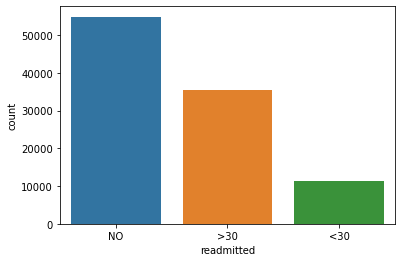

In [8]:
sns.countplot(x="readmitted", data=df)

This will give us an idea of the distribution of the target variable and the imbalance in the dataset.

<AxesSubplot:xlabel='readmitted', ylabel='count'>

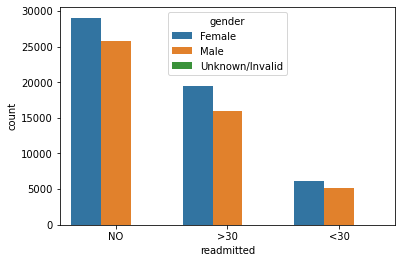

In [9]:
sns.countplot(x="readmitted", hue="gender", data=df)

This will give us an idea of how the target variable is distributed across different values of the "gender" feature.

Similarly, we can explore the relationship between the target variable and other features like "age", "admission_type_id", "discharge_disposition_id", "admission_source_id", "time_in_hospital", etc.

We can also check for correlations between the numerical features in the dataset using a correlation matrix.

<AxesSubplot:>

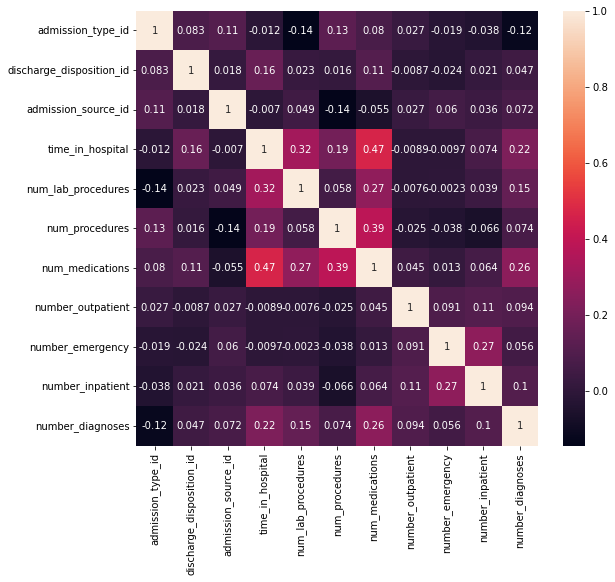

In [58]:
corr_matrix = df.corr()
plt.figure(figsize = (9,8))
sns.heatmap(corr_matrix, annot=True)


This will give us an idea of the strength and direction of the linear relationships between the numerical features in the dataset.

#### 1. Explore Categorical Features:
We can explore the distribution of categorical features like race, gender, admission_type_id, discharge_disposition_id, and admission_source_id, etc. using countplots.

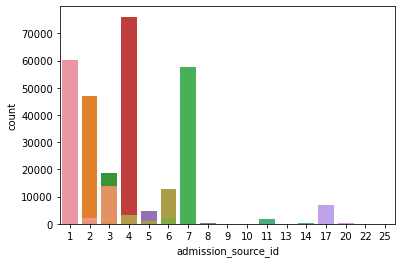

In [59]:
# Assuming 'df' is the DataFrame you want to use
variables_to_plot = ["race", "gender", "admission_type_id", "discharge_disposition_id", "admission_source_id"]

for variable in variables_to_plot:
    sns.countplot(x=variable, data=df)


#### 2.Age Distribution:
We can explore the distribution of the age feature using a histogram or a boxplot.

<AxesSubplot:xlabel='age', ylabel='Count'>

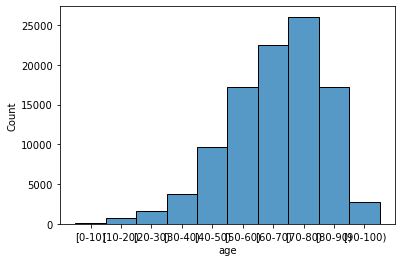

In [12]:
sns.histplot(x="age", data=df)

#### 3. Check for Outliers:
We can check for the presence of outliers in numerical features using boxplots

<AxesSubplot:xlabel='number_inpatient'>

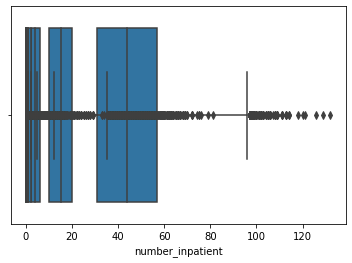

In [13]:
sns.boxplot(x="time_in_hospital", data=df)
sns.boxplot(x="num_lab_procedures", data=df)
sns.boxplot(x="num_procedures", data=df)
sns.boxplot(x="num_medications", data=df)
sns.boxplot(x="number_outpatient", data=df)
sns.boxplot(x="number_emergency", data=df)
sns.boxplot(x="number_inpatient", data=df)

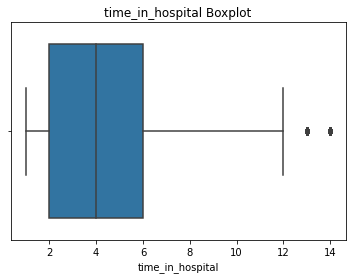

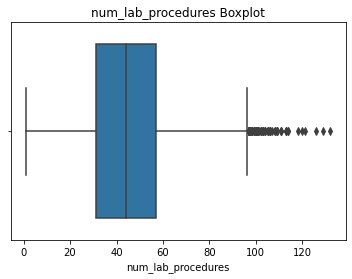

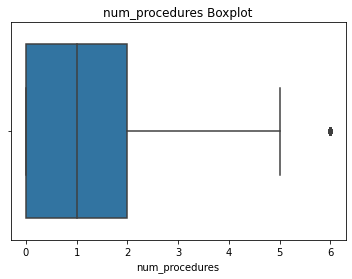

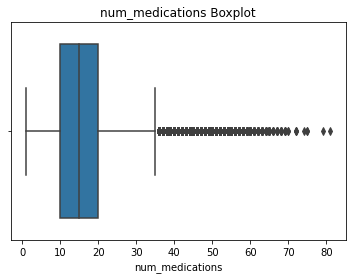

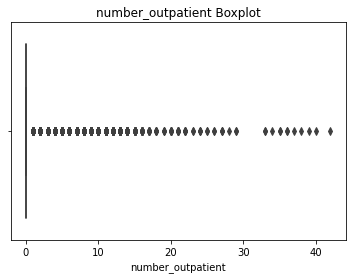

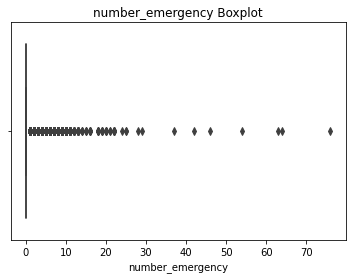

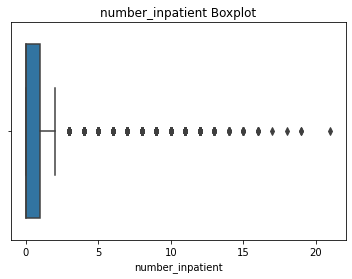

In [14]:
# Assuming 'df' is the DataFrame you want to use
variables_to_plot = ["time_in_hospital", "num_lab_procedures", "num_procedures", "num_medications", "number_outpatient", "number_emergency", "number_inpatient"]

for variable in variables_to_plot:
    sns.boxplot(x=variable, data=df)
    plt.title(f"{variable} Boxplot")
    plt.show()


#### 4. Relationship between numerical features:
We can explore the relationship between numerical features using scatterplots

<AxesSubplot:xlabel='num_medications', ylabel='time_in_hospital'>

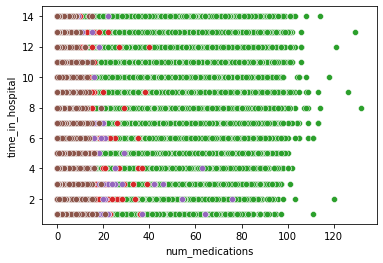

In [23]:
sns.scatterplot(x="num_medications", y="time_in_hospital", data=df)
sns.scatterplot(x="num_procedures", y="time_in_hospital", data=df)
sns.scatterplot(x="num_lab_procedures", y="time_in_hospital", data=df)
sns.scatterplot(x="number_outpatient", y="time_in_hospital", data=df)
sns.scatterplot(x="number_emergency", y="time_in_hospital", data=df)
sns.scatterplot(x="number_inpatient", y="time_in_hospital", data=df)

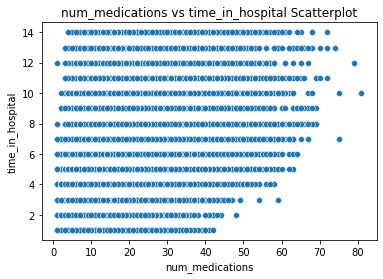

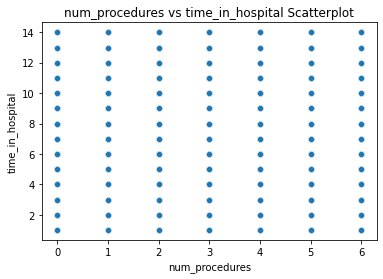

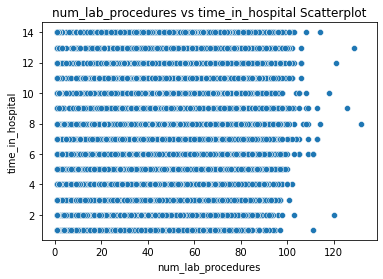

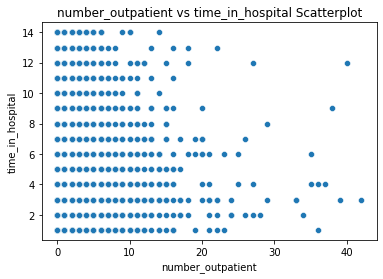

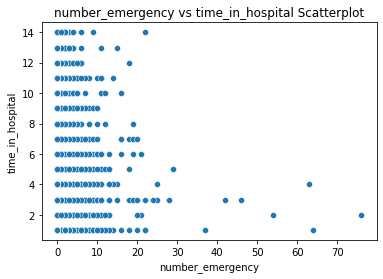

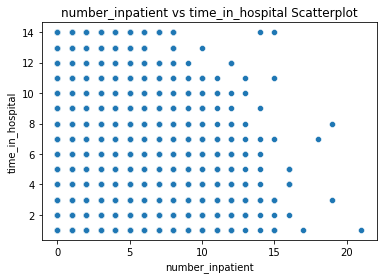

In [14]:
# Assuming 'df' is the DataFrame you want to use
variable_pairs_to_plot = [("num_medications", "time_in_hospital"), 
                          ("num_procedures", "time_in_hospital"), 
                          ("num_lab_procedures", "time_in_hospital"), 
                          ("number_outpatient", "time_in_hospital"), 
                          ("number_emergency", "time_in_hospital"), 
                          ("number_inpatient", "time_in_hospital")]

for x_variable, y_variable in variable_pairs_to_plot:
    sns.scatterplot(x=x_variable, y=y_variable, data=df)
    plt.title(f"{x_variable} vs {y_variable} Scatterplot")
    plt.show()


#### 5. Correlation with target variable:
We can explore the correlation between numerical features and the target variable using boxplots.

<AxesSubplot:xlabel='readmitted', ylabel='number_inpatient'>

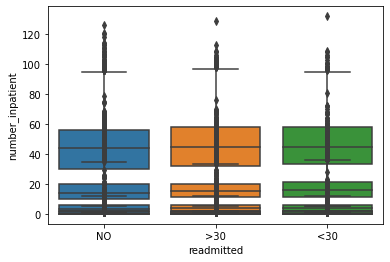

In [26]:
sns.boxplot(x="readmitted", y="time_in_hospital", data=df)
sns.boxplot(x="readmitted", y="num_medications", data=df)
sns.boxplot(x="readmitted", y="num_lab_procedures", data=df)
sns.boxplot(x="readmitted", y="num_procedures", data=df)
sns.boxplot(x="readmitted", y="number_outpatient", data=df)
sns.boxplot(x="readmitted", y="number_emergency", data=df)
sns.boxplot(x="readmitted", y="number_inpatient", data=df)

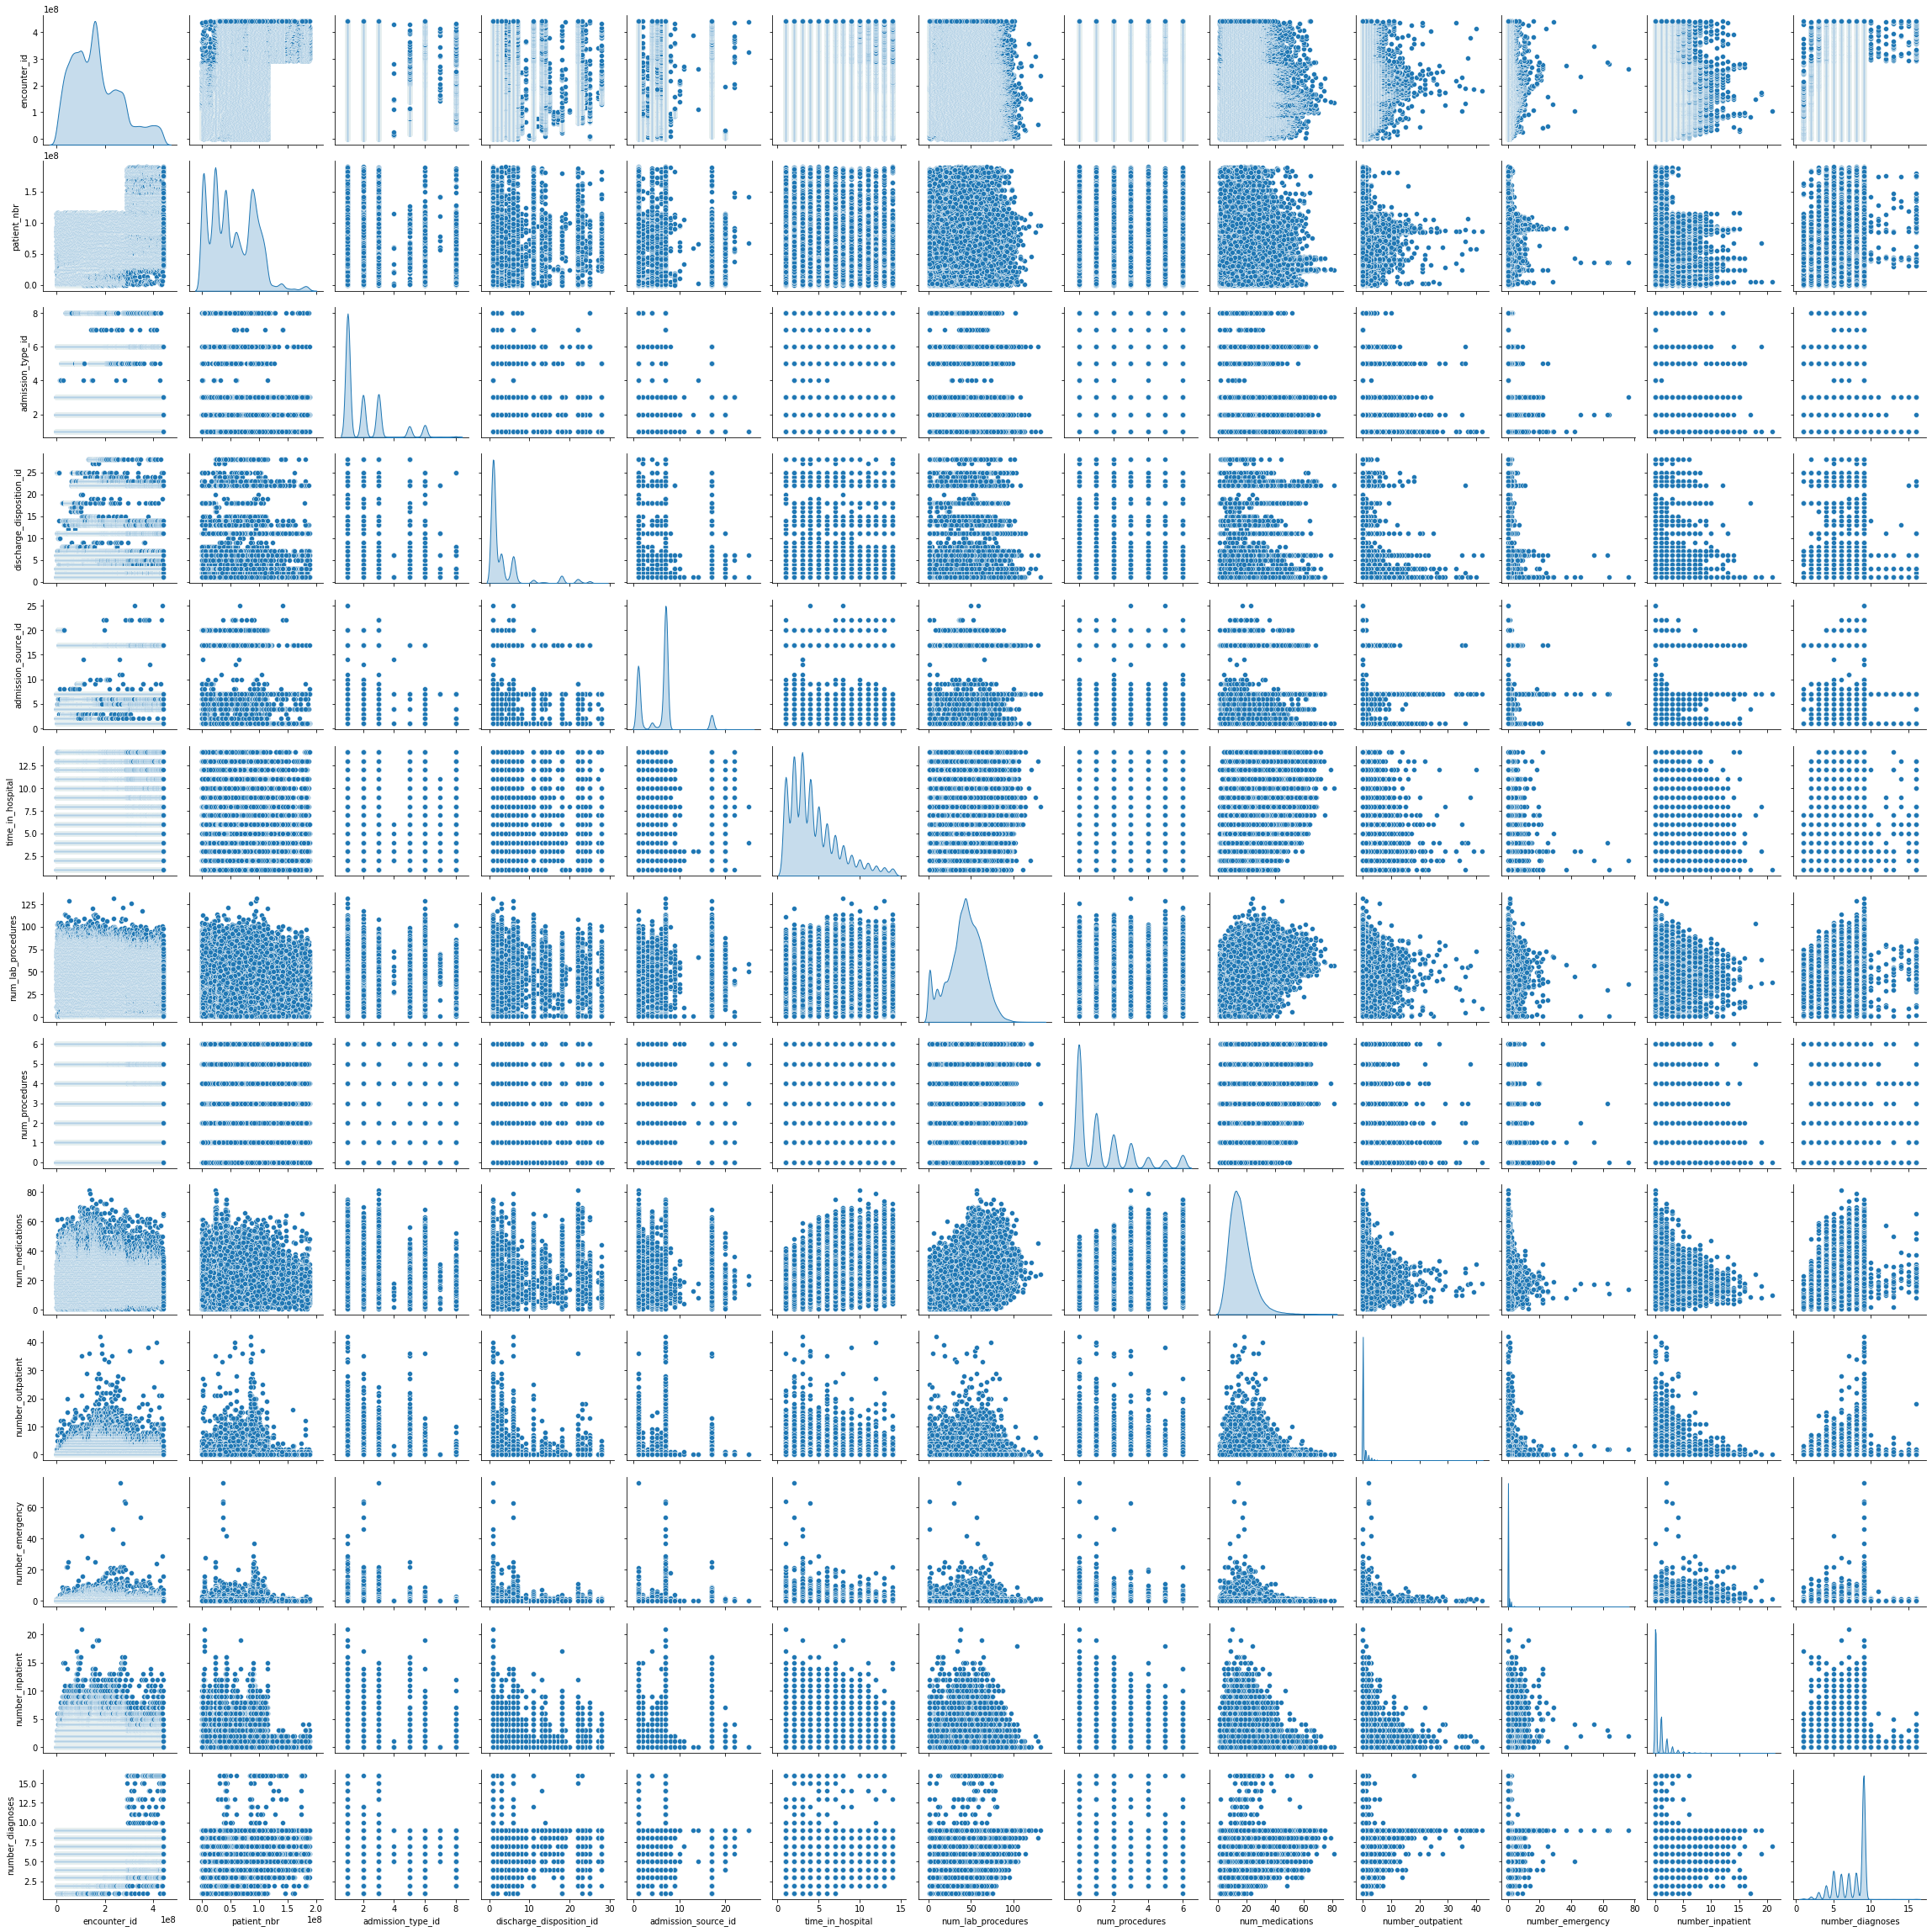

In [30]:
sns.pairplot(df,diag_kind='kde')

#### 6. Imbalanced Target Variable:

We can explore the class distribution of the target variable "readmitted" using a countplot. If the class distribution is highly imbalanced, it can affect the performance of our machine learning models.

<AxesSubplot:xlabel='readmitted', ylabel='count'>

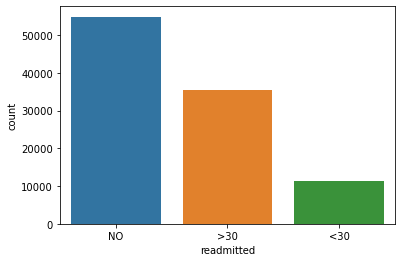

In [16]:
sns.countplot(x="readmitted", data=df)

#### 7. Feature Correlation:

We can explore the correlation between different features in the dataset using a correlation matrix and a heatmap.

<AxesSubplot:>

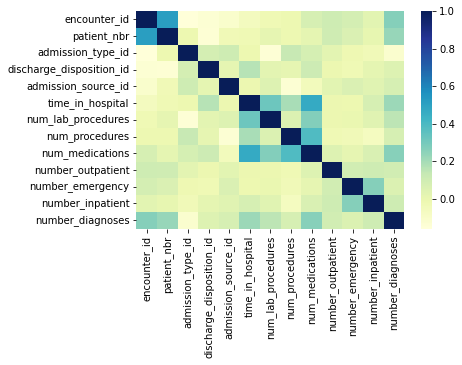

In [18]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, cmap="YlGnBu")

This will give us an idea of the correlation between different numerical features in the dataset. It can also help us identify any highly correlated features that may need to be removed to avoid multicollinearity.

#### 8.Missing Values:

<Figure size 648x576 with 0 Axes>

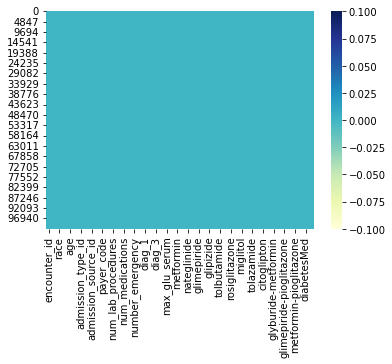

<Figure size 648x576 with 0 Axes>

In [20]:
sns.heatmap(df.isnull(), cmap="YlGnBu")
plt.figure(figsize = (9,8))

<AxesSubplot:>

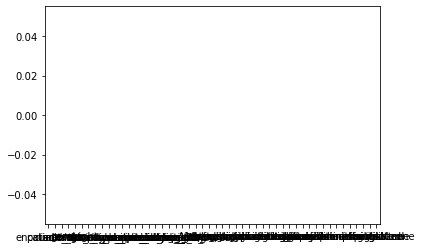

In [22]:
missing_data = df.isnull().sum() / len(df) * 100
sns.barplot(x=missing_data.index, y=missing_data)

#### 9. Outliers Detection:
We can detect outliers in numerical features using z-score or IQR method and plot the distribution after removing outliers

<AxesSubplot:xlabel='number_inpatient'>

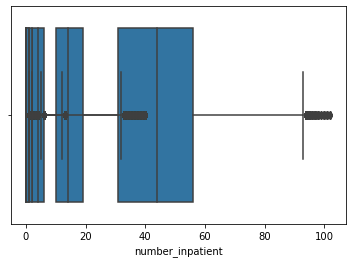

In [27]:
#from scipy.stats import zscore
z_scores = zscore(df.select_dtypes(include=np.number))
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
df_filtered = df[filtered_entries]

sns.boxplot(x="time_in_hospital", data=df_filtered)
sns.boxplot(x="num_lab_procedures", data=df_filtered)
sns.boxplot(x="num_procedures", data=df_filtered)
sns.boxplot(x="num_medications", data=df_filtered)
sns.boxplot(x="number_outpatient", data=df_filtered)
sns.boxplot(x="number_emergency", data=df_filtered)
sns.boxplot(x="number_inpatient", data=df_filtered)
